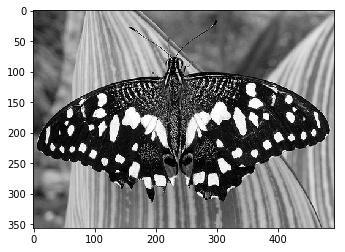

In [179]:
import cv2
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage.filters import gaussian_laplace
from skimage import transform

image = cv2.imread("butterfly.jpg",0)
image = image/255.0
from scipy import ndimage
from scipy.ndimage import filters
from scipy import spatial
k = 1.414
sigma = 1.0
imshow(image,cmap="gray")

In [180]:
def ineffcient_scale(image,scale,k,level):
    h,w = image.shape
    n = level
    tmp = image
    scale_space = np.empty((h,w,n))
    for i in range(n):
        scale_space[:,:,i] = np.square(gaussian_laplace(tmp,sigma = scale)*math.pow(scale,2))
        scale*=k
    return scale_space

In [181]:
def effcient_scale(image,scale,k,level):
    h,w = image.shape
    n = level
    matrix=[]
    tmp = image
    scale_space = np.empty((h,w,n))
    for i in range(n):
        matrix = transform.resize(np.square(gaussian_laplace(tmp,sigma = scale)),(h,w))
        scale_space[:,:,i] = matrix
        tmp = transform.resize(tmp,(math.ceil(tmp.shape[0]/k),math.ceil(tmp.shape[1]/k)))
    return scale_space

In [182]:
def nomaximum_suppression(scale_space,level,threshold):
    n = level
    before = np.copy(scale_space)
    for i in range(n):
        scale_space[:,:,i] = filters.rank_filter(scale_space[:,:,i],-1,size = (3,3))
    scale_space = filters.rank_filter(scale_space,-1,size = (3,3,3))
    after = np.clip(scale_space,threshold,None)
    out = after-before
    return out

In [183]:
def find_circle(out,scale,k,level,threshold):
    n = level
    x = np.asarray([])
    y = np.asarray([])
    r = np.asarray([])
    for i in range(n):
        inx = np.where(out[:,:,i] == 0)
        x = np.concatenate((x,inx[1]))
        y = np.concatenate((x,inx[0]))
        num = len(inx[0])
        r = np.concatenate((r,np.full(num,math.sqrt(2)*scale)))
        scale *=k
    return x,y,r

In [185]:
image = cv2.imread("butterfly.jpg",0)
image = image/255.0
k = 1.414
level = 15
scale = 2
threshold = 0.0095
scale_space = effcient_scale(image,scale,k,level)
out = nomaximum_suppression(scale_space,level,threshold)
x,y,r = find_circle(out,scale,k,level,threshold)

ax.imshow(image, interpolation='nearest',cmap="gray")
for i in range(len(x)):
    c = plt.Circle((x[i], y[i]), r[i]*1.414, color='red', linewidth=1.5, fill=False)
    ax.add_patch(c)
fig, ax = plt.subplots()

    
time.time()
ax.plot()  
plt.show()